# Voigt?

In [6]:
%matplotlib notebook

In [24]:
# imports
import numpy as np

from matplotlib import pyplot as plt

from astropy import units

from specdb import specdb

from linetools.spectralline import AbsLine
from linetools.analysis import voigt

# Load

In [3]:
act_v = np.load('act_v.npy')

In [5]:
act_v.size

1600

In [11]:
igmsp = specdb.IgmSpec()

Loading igmspec from /u/xavier/SPECDB/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Version: v02.1


/home/xavier/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


# View

<IPython.core.display.Javascript object>


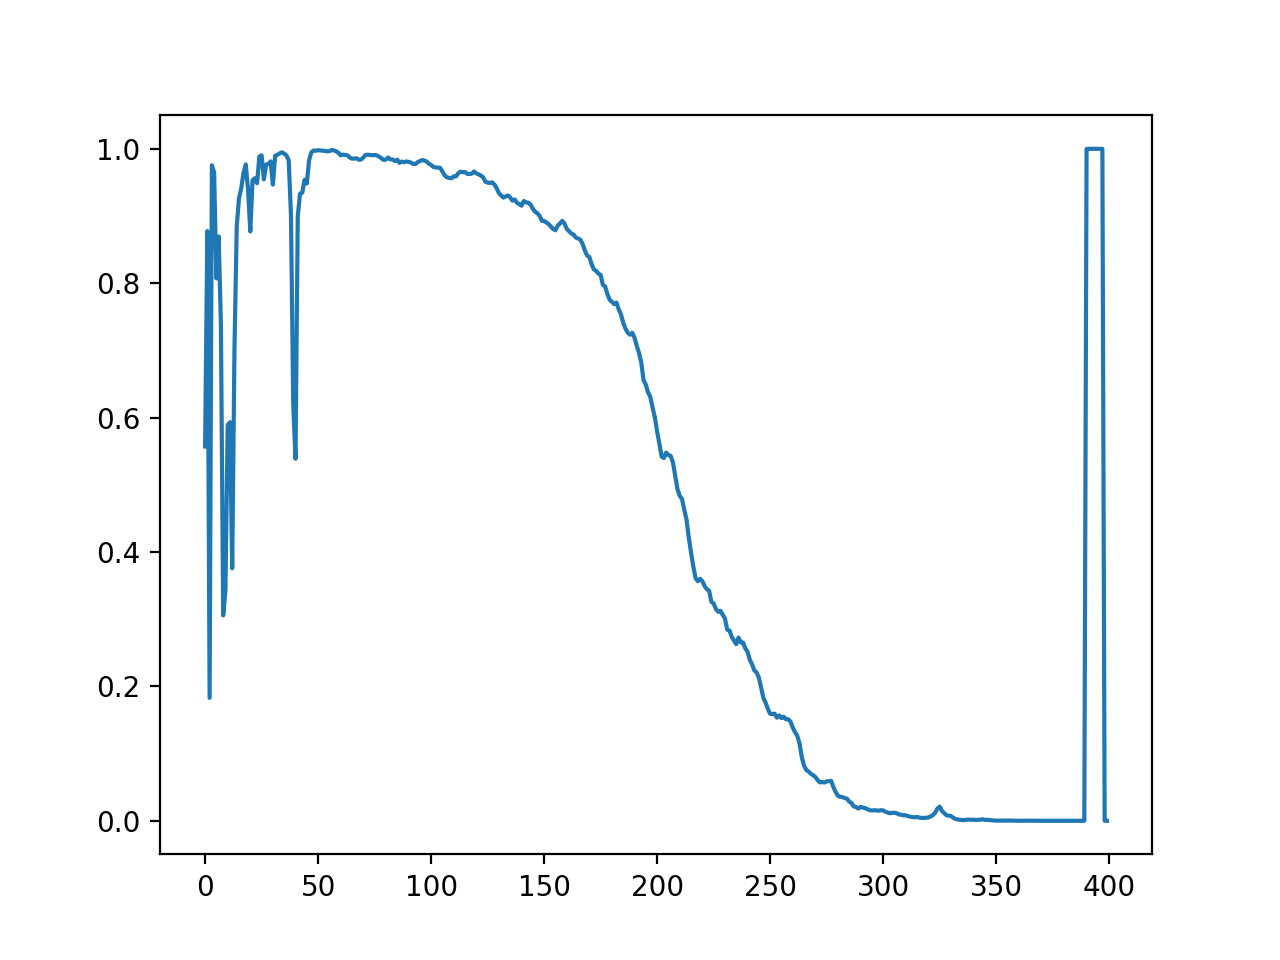

In [8]:
plt.clf()
ax = plt.gca()
#
ax.plot(act_v[0:400])
#
plt.show()

# Example 1

In [9]:
ex1 = act_v[0:400]

In [12]:
xspec, meta = igmsp.get_sdss(3758, 325)

Grabbing data for J081240.6883+320808.5896
Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra


/home/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


In [16]:
wave1 = xspec[0].wavelength[800:1200]

In [17]:
wave1

<Quantity [4291.41064453, 4292.39794922, 4293.38769531, 4294.37548828,
           4295.36328125, 4296.35351562, 4297.34228516, 4298.33300781,
           4299.32177734, 4300.31347656, 4301.30273438, 4302.29199219,
           4303.28417969, 4304.27441406, 4305.26660156, 4306.25732422,
           4307.25      , 4308.24121094, 4309.23193359, 4310.22607422,
           4311.21728516, 4312.21142578, 4313.20361328, 4314.19824219,
           4315.19042969, 4316.18359375, 4317.17871094, 4318.171875  ,
           4319.16748047, 4320.16113281, 4321.15722656, 4322.15136719,
           4323.14599609, 4324.14257812, 4325.13769531, 4326.13476562,
           4327.12988281, 4328.12792969, 4329.12353516, 4330.11962891,
           4331.11816406, 4332.11425781, 4333.11328125, 4334.11035156,
           4335.10986328, 4336.10693359, 4337.10693359, 4338.10449219,
           4339.10253906, 4340.10302734, 4341.1015625 , 4342.10253906,
           4343.1015625 , 4344.10302734, 4345.10253906, 4346.10205078,
      

In [33]:
z = wave1[325].value/1215.6701 - 1.
z

2.804384081308325

In [34]:
lya = AbsLine('HI 1215')

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [35]:
lya.setz(z)

In [40]:
lya.attrib['N'] = 7e21 / units.cm**2
lya.attrib['b'] = 30 * units.km/units.s

In [41]:
model = voigt.voigt_from_abslines(wave1, lya, fwhm=2.)

## Plot

<IPython.core.display.Javascript object>


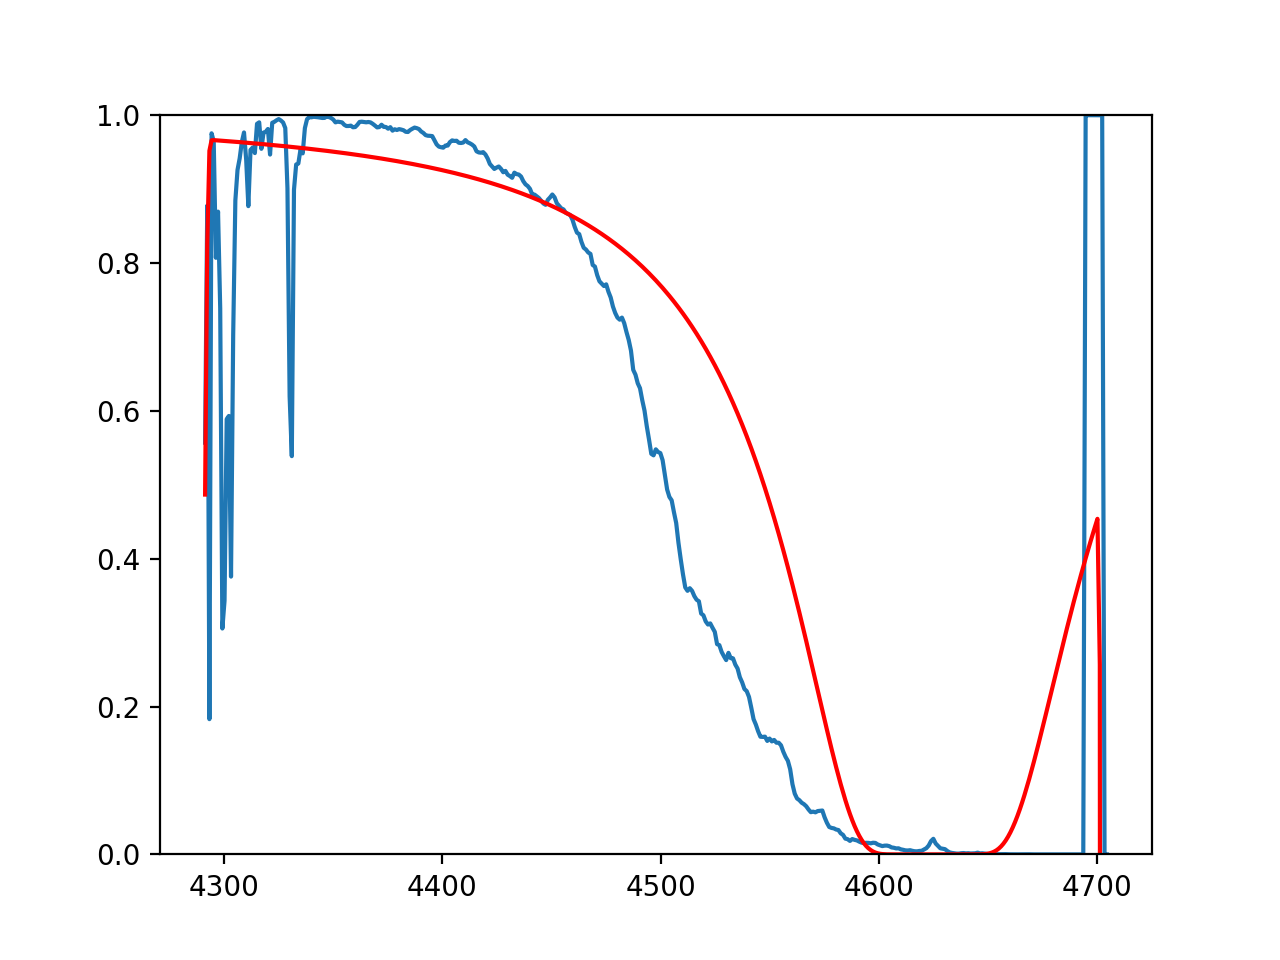

In [42]:
plt.clf()
ax = plt.gca()
#
ax.plot(wave1, ex1)
ax.plot(wave1, model.flux, color='r')
#
ax.set_ylim(0., 1.)
#
plt.show()